In [ ]:
!pip install phik
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import phik
from phik import resources, report
from scipy.stats import spearmanr
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
#@title data

amsterdam_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/amsterdam_weekdays.csv', index_col=0)
amsterdam_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/amsterdam_weekends.csv', index_col=0)

athens_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/athens_weekdays.csv', index_col=0)
athens_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/athens_weekends.csv', index_col=0)

barcelona_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/barcelona_weekdays.csv', index_col=0)
barcelona_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/barcelona_weekends.csv', index_col=0)

berlin_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/berlin_weekdays.csv', index_col=0)
berlin_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/berlin_weekends.csv', index_col=0)

budapest_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/budapest_weekdays.csv', index_col=0)
budapest_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/budapest_weekends.csv', index_col=0)

lisbon_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/lisbon_weekdays.csv', index_col=0)
lisbon_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/lisbon_weekends.csv', index_col=0)

london_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/london_weekdays.csv', index_col=0)
london_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/london_weekends.csv', index_col=0)

paris_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/paris_weekdays.csv', index_col=0)
paris_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/paris_weekends.csv', index_col=0)

rome_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/rome_weekdays.csv', index_col=0)
rome_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/rome_weekends.csv', index_col=0)

vienna_weekdays = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/vienna_weekdays.csv', index_col=0)
vienna_weekends = pd.read_csv('https://raw.githubusercontent.com/Tigeneric/MathshubEda/main/vienna_weekends.csv', index_col=0)



In [ ]:
city_days = [amsterdam_weekdays, athens_weekdays, barcelona_weekdays, berlin_weekdays, budapest_weekdays, lisbon_weekdays, london_weekdays, paris_weekdays, rome_weekdays, vienna_weekdays]
city_ends = [amsterdam_weekends, athens_weekends, barcelona_weekends, berlin_weekends, budapest_weekends, lisbon_weekends, london_weekends, paris_weekends, rome_weekends, vienna_weekends]
city_names = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']

def add_city(df_list, city_name):
    for df, name in zip(df_list, city_names):
        df['city'] = name

add_city(city_days, city_names)
add_city(city_ends, city_names)

merged_city_days = pd.concat(city_days, ignore_index=True)
merged_city_ends = pd.concat(city_ends, ignore_index=True)
merged_city = pd.concat([merged_city_days.assign(day='weekday'), merged_city_ends.assign(day='weekend')])

 Зависимость между стоимостью, рейтингом, расстоянием до центра, типом комнаты и рейтингом чистоты методом Пирсона

In [ ]:
merged_city['room_type'] = pd.factorize(merged_city['room_type'])[0]
print('Матрица коэффициентов корреляции')
for city in merged_city['city'].unique():
  city_data = merged_city[merged_city['city'] == city]
  print(f'\nДля города {city}')
  matrix_data = city_data[['realSum','dist','room_type','guest_satisfaction_overall','cleanliness_rating']]
  correlation = matrix_data.corr(method='pearson')
  print(correlation)

Коэффициенты корреляции

Для города amsterdam
                             realSum      dist  room_type  \
realSum                     1.000000 -0.262208   0.387874   
dist                       -0.262208  1.000000  -0.104246   
room_type                   0.387874 -0.104246   1.000000   
guest_satisfaction_overall  0.130790 -0.058317   0.145693   
cleanliness_rating          0.033699 -0.019225  -0.010357   

                            guest_satisfaction_overall  cleanliness_rating  
realSum                                       0.130790            0.033699  
dist                                         -0.058317           -0.019225  
room_type                                     0.145693           -0.010357  
guest_satisfaction_overall                    1.000000            0.657592  
cleanliness_rating                            0.657592            1.000000  

Для города athens
                             realSum      dist  room_type  \
realSum                     1.000000 -0.11246

Вывод: исследуемые факторы не влияют на стоимость жилья.

На общий рейтинг в значительной степени влияет только рейтинг чистоты - только между этими двумя переменными наблюдается корреляция

 Зависимость между стоимостью, рейтингом, расстоянием до центра, типом комнаты и рейтингом чистоты методом  ϕ_k

In [ ]:
print('Матрица коэффициентов корреляции')
for city in merged_city['city'].unique():
  city_data = merged_city[merged_city['city'] == city]
  print(f'\nДля города {city}')
  print(city_data[['realSum','dist','room_type','guest_satisfaction_overall','cleanliness_rating']].phik_matrix(interval_cols=['realSum','dist','room_type','guest_satisfaction_overall','cleanliness_rating']))

Матрица коэффициентов корреляции

Для города amsterdam
                             realSum      dist  room_type  \
realSum                     1.000000  0.195101   0.414417   
dist                        0.195101  1.000000   0.312364   
room_type                   0.414417  0.312364   1.000000   
guest_satisfaction_overall  0.000000  0.220931   0.145885   
cleanliness_rating          0.000000  0.138907   0.090793   

                            guest_satisfaction_overall  cleanliness_rating  
realSum                                       0.000000            0.000000  
dist                                          0.220931            0.138907  
room_type                                     0.145885            0.090793  
guest_satisfaction_overall                    1.000000            0.867397  
cleanliness_rating                            0.867397            1.000000  

Для города athens
                            realSum      dist  room_type  \
realSum                         1.0  

Вывод аналогичный методике рассчёта к.к. Пирсона

In [ ]:
def add_city(df_list, city_name):
    for df, name in zip(df_list, city_names):
        df['city'] = name

In [ ]:
add_city(city_days, city_names)
add_city(city_ends, city_names)

merged_city_days = pd.concat(city_days, ignore_index=True)
merged_city_ends = pd.concat(city_ends, ignore_index=True)

In [ ]:
merged_city_days.groupby(['city'])['realSum'].describe()

count        mean         std         min         25%         50%  \
city                                                                            
amsterdam  1103.0  545.020526  416.974314  128.887118  309.797764  430.248635   
athens     2653.0  155.866982  366.573124   42.884259   99.594591  127.715417   
barcelona  1555.0  288.391667  321.180435   69.588289  161.984779  208.532129   
berlin     1284.0  240.220422  230.318175   64.971487  143.731887  187.786295   
budapest   2074.0  168.429367  126.059120   37.129295  122.432674  147.459698   
lisbon     2857.0  236.345459  108.463770   70.825516  160.178236  223.030019   
london     4614.0  360.230348  507.782888   64.676968  167.454550  256.355982   
paris      3130.0  398.786678  396.367985   92.739305  240.003728  318.529220   
rome       4492.0  201.618053  117.749372   46.057092  136.067145  179.786314   
vienna     1738.0  240.384834  454.526276   69.653834  162.213963  204.520487   

                  75%           max  
city                                 
amsterdam  657.324303   7782.907225  
athens     171.537037  18545.450285  
barcelona  335.373659   6943.700980  
berlin     277.005235   5857.483407  
budapest   184.941486   3630.681017  
lisbon     284.005629   1681.050657  
london     435.452386  15499.894165  
paris      463.463510  16445.614689  
rome       235.195100   2418.348023  
vienna     266.636281  13664.305916

In [ ]:
merged_city_ends.groupby(['city'])['realSum'].describe()

count        mean         std         min         25%         50%  \
city                                                                            
amsterdam   977.0  604.828018  443.682821  165.912872  362.758653  491.645771   
athens     2627.0  147.580456   79.814934   42.884259   98.657231  127.715417   
barcelona  1278.0  300.277940  393.207126   80.992390  159.657412  204.691973   
berlin     1284.0  240.220422  230.318175   64.971487  143.731887  187.786295   
budapest   2074.0  168.429367  126.059120   37.129295  122.432674  147.459698   
lisbon     2857.0  236.345459  108.463770   70.825516  160.178236  223.030019   
london     4614.0  360.230348  507.782888   64.676968  167.454550  256.355982   
paris      3130.0  398.786678  396.367985   92.739305  240.003728  318.529220   
rome       4492.0  201.618053  117.749372   46.057092  136.067145  179.786314   
vienna     1738.0  240.384834  454.526276   69.653834  162.213963  204.520487   

                  75%           max  
city                                 
amsterdam  716.612378   8130.668104  
athens     171.537037   1043.282638  
barcelona  327.169688   6942.770033  
berlin     277.005235   5857.483407  
budapest   184.941486   3630.681017  
lisbon     284.005629   1681.050657  
london     435.452386  15499.894165  
paris      463.463510  16445.614689  
rome       235.195100   2418.348023  
vienna     266.636281  13664.305916

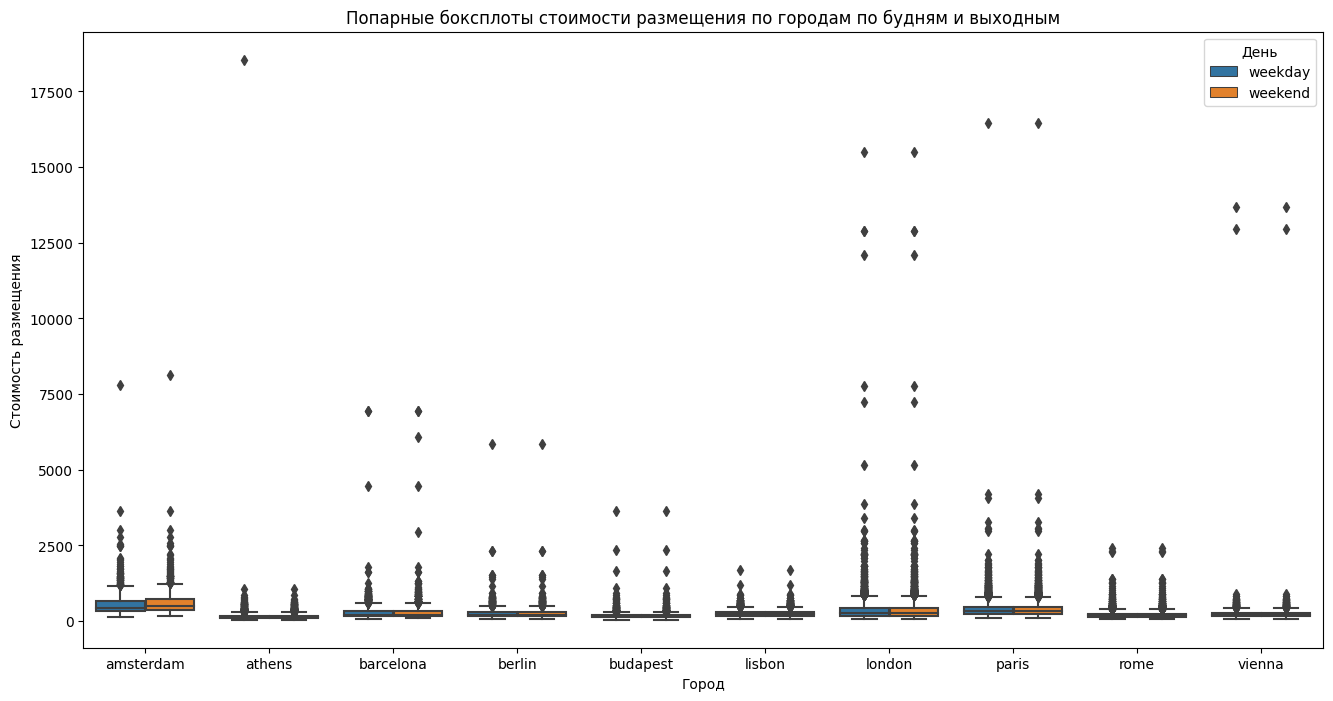

In [ ]:
merged_city = pd.concat([merged_city_days.assign(day='weekday'), merged_city_ends.assign(day='weekend')])

plt.figure(figsize=(16, 8))
sns.boxplot(x='city', y='realSum', hue='day', data=merged_city, whis=1.5)
plt.title('Попарные боксплоты стоимости размещения по городам по будням и выходным')
plt.xlabel('Город')
plt.ylabel('Стоимость размещения')
plt.legend(title='День')
plt.show()

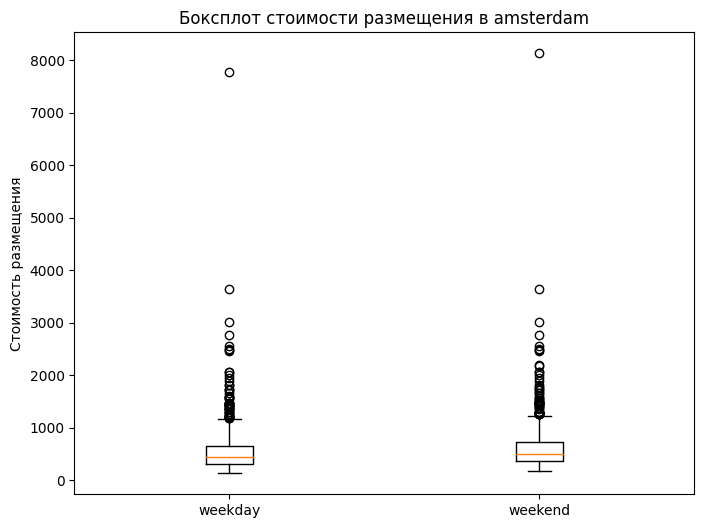

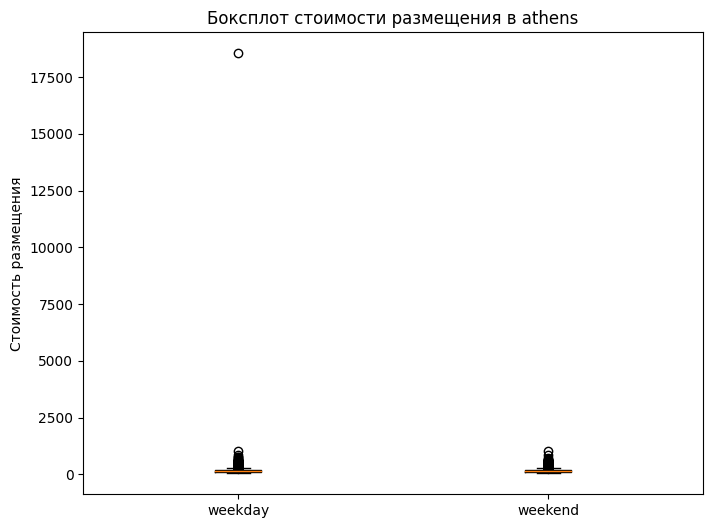

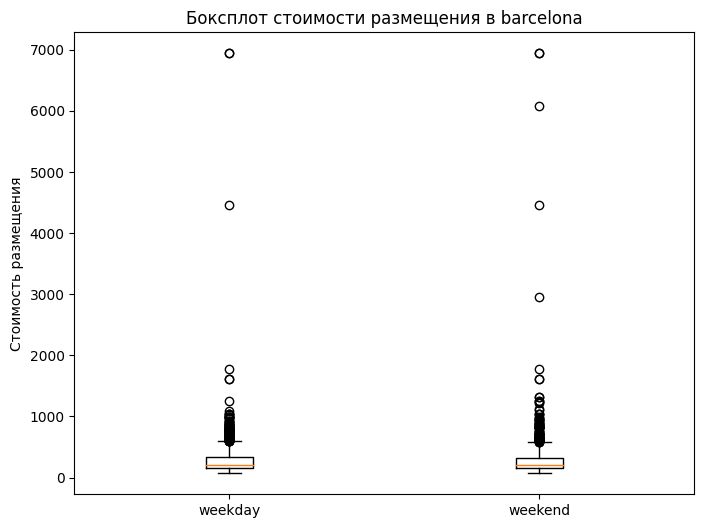

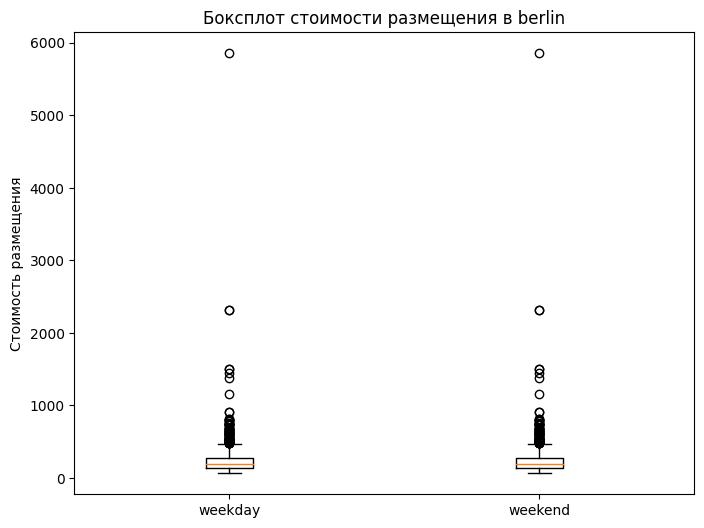

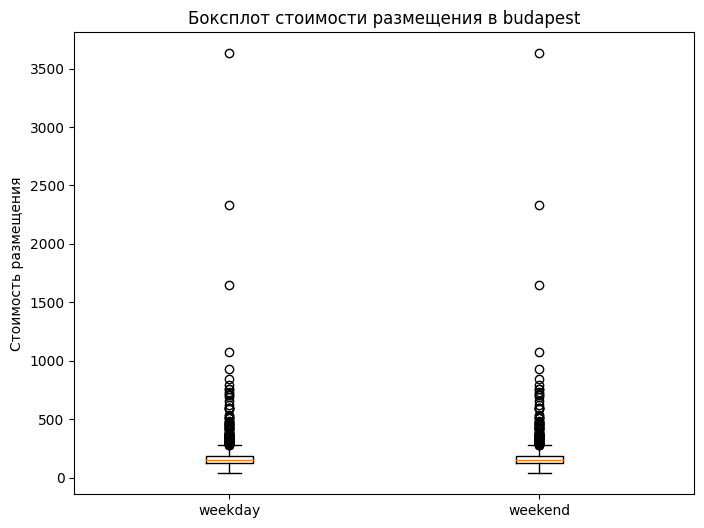

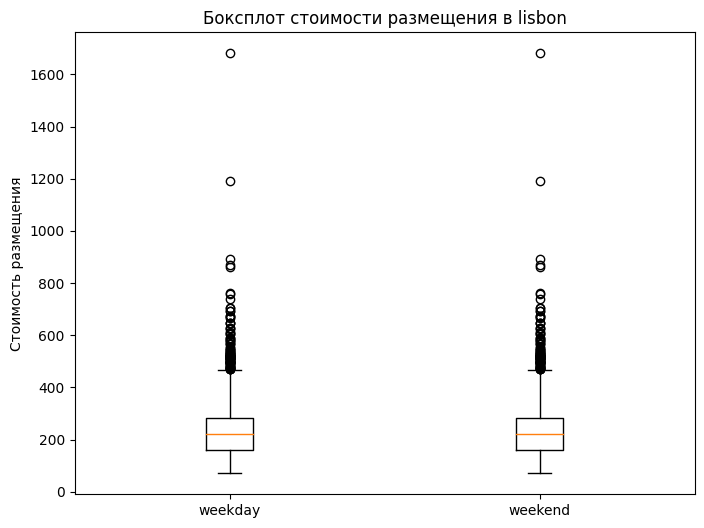

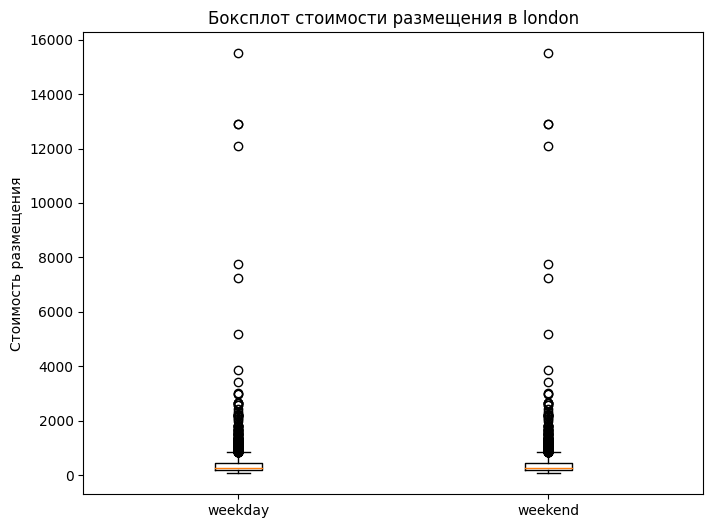

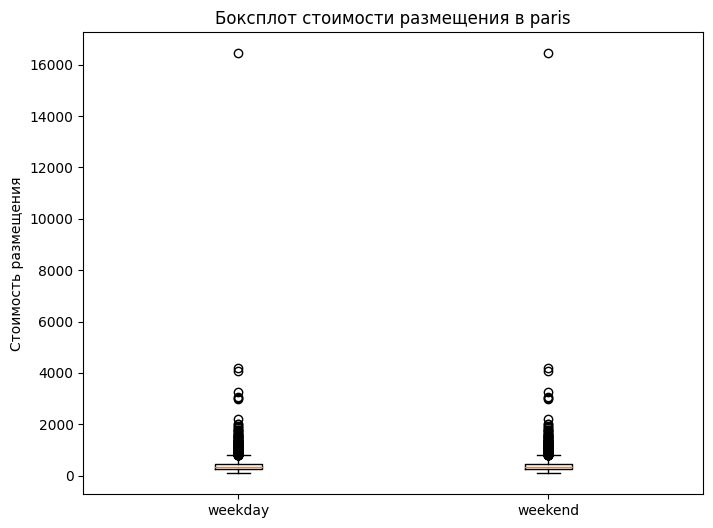

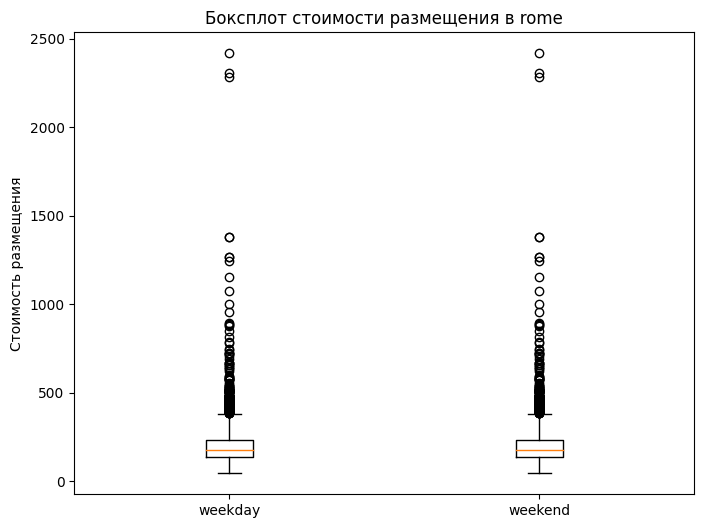

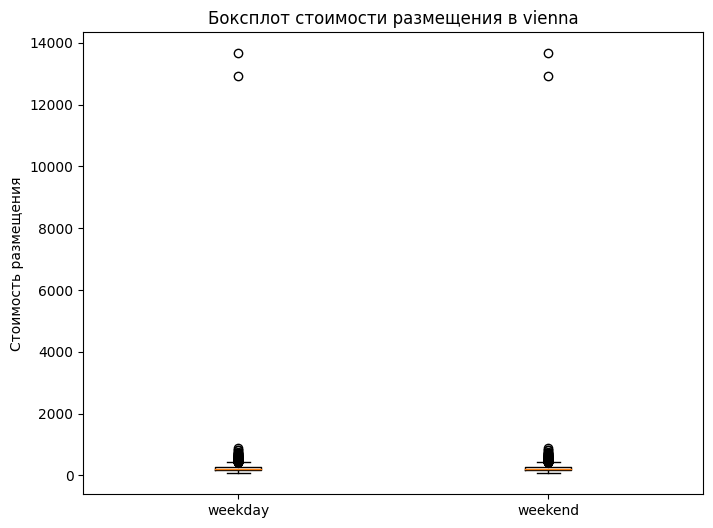

In [ ]:
# Создаем отдельные графики для каждого города
for city in merged_city['city'].unique():

    city_data = merged_city[merged_city['city'] == city]

    plt.figure(figsize=(8, 6))
    plt.boxplot([city_data[city_data['day'] == 'weekday']['realSum'], city_data[city_data['day'] == 'weekend']['realSum']], labels=['weekday', 'weekend'])
    plt.title(f'Боксплот стоимости размещения в {city}')
    plt.ylabel('Стоимость размещения')
    plt.show()

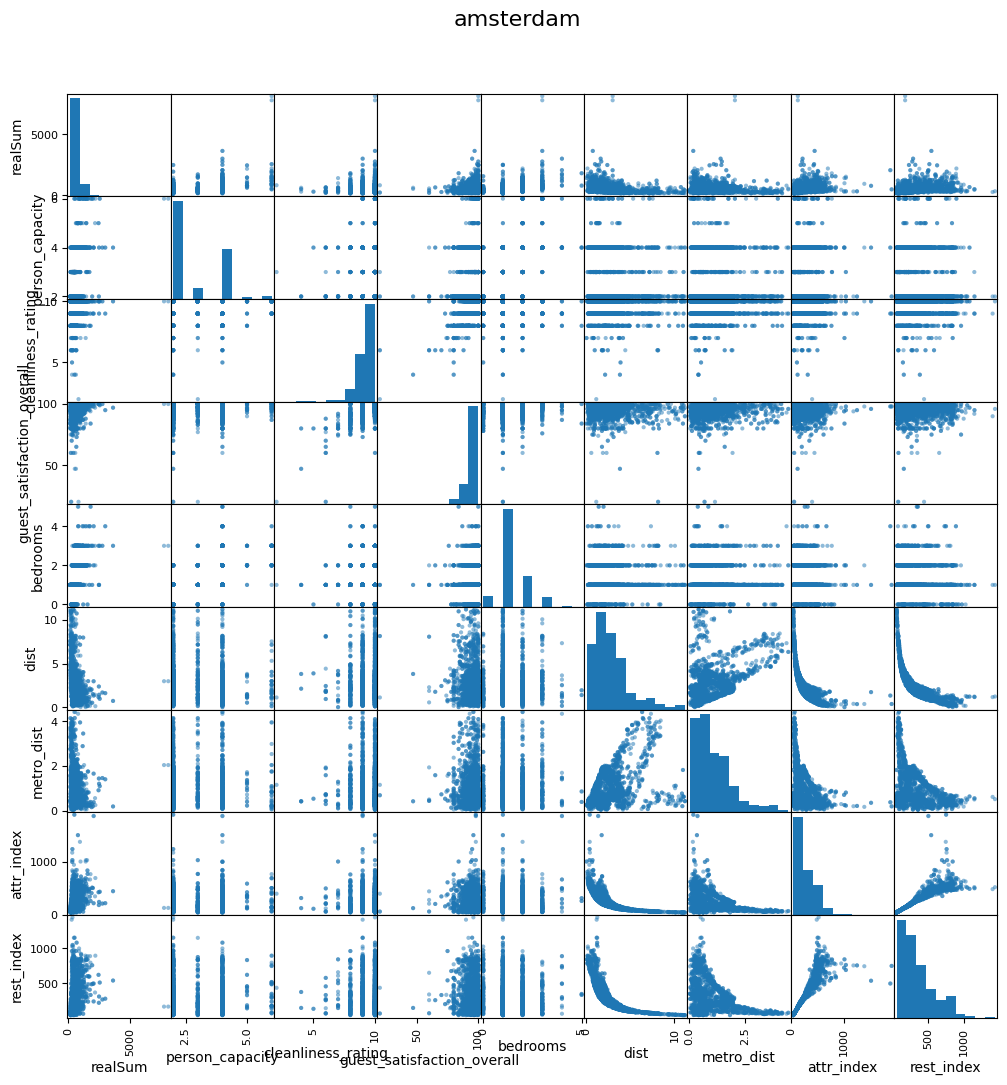

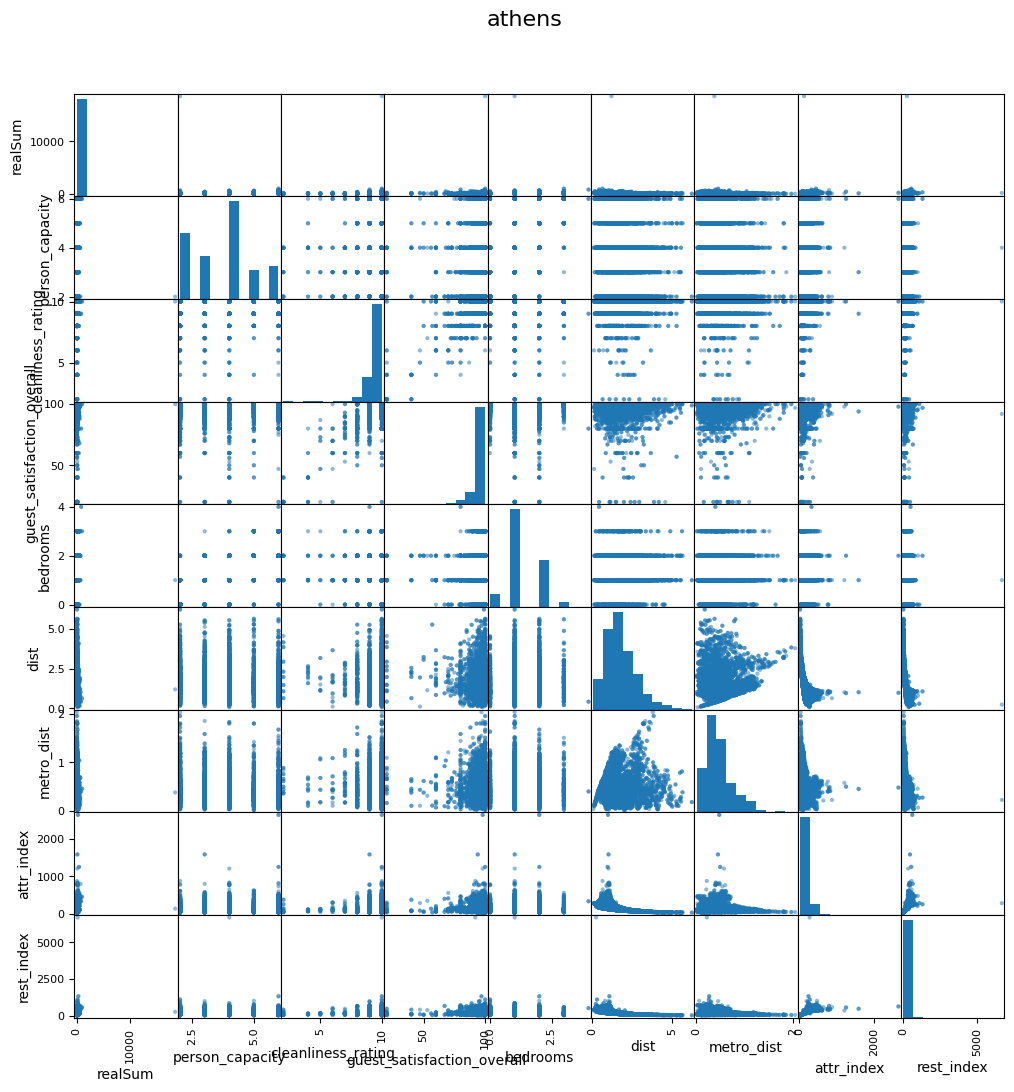

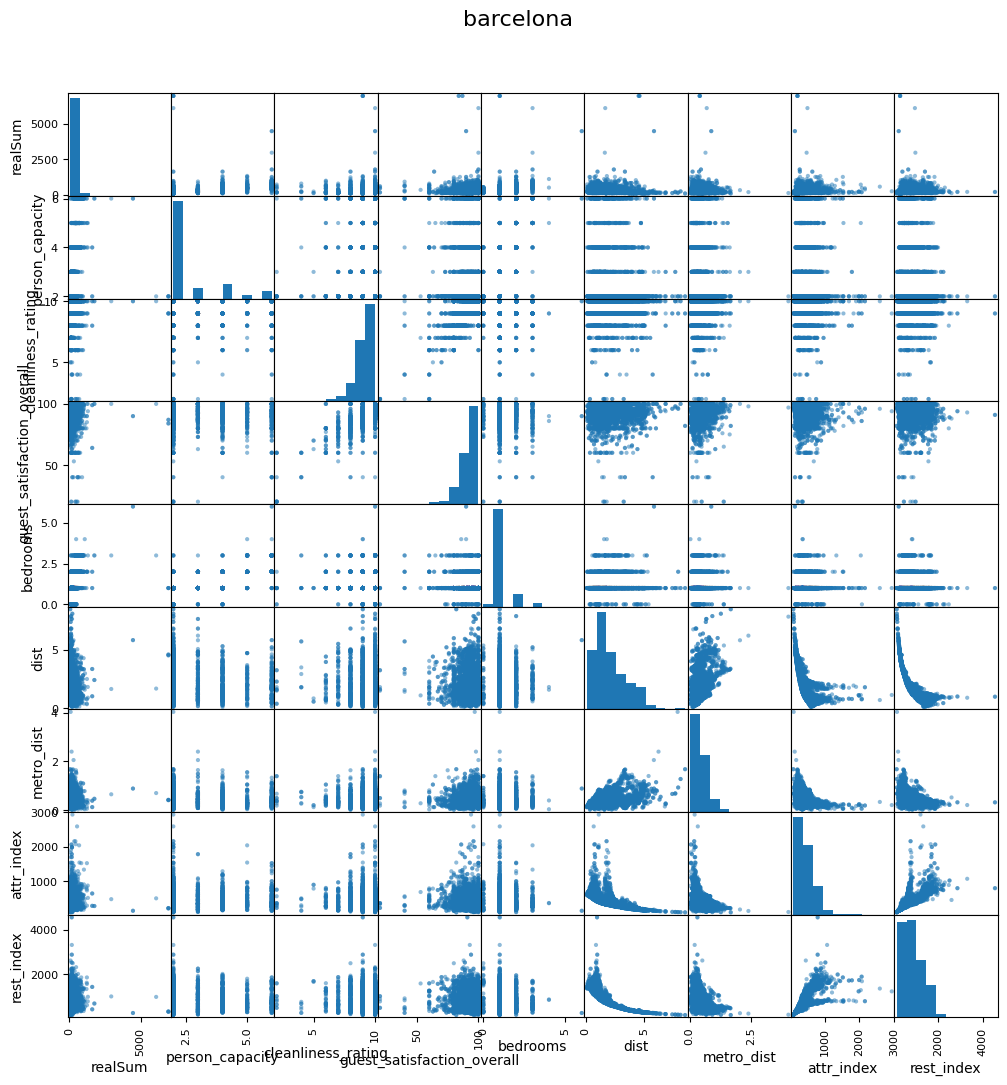

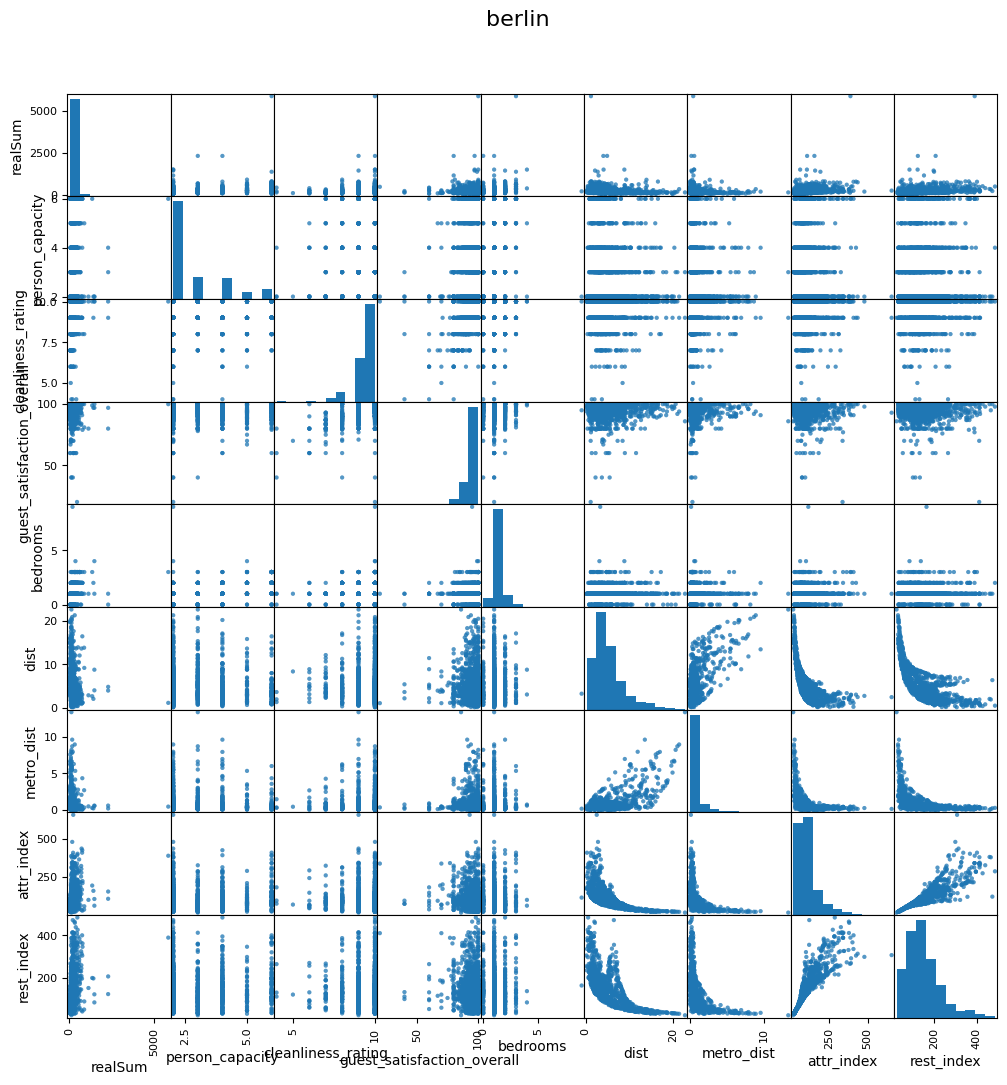

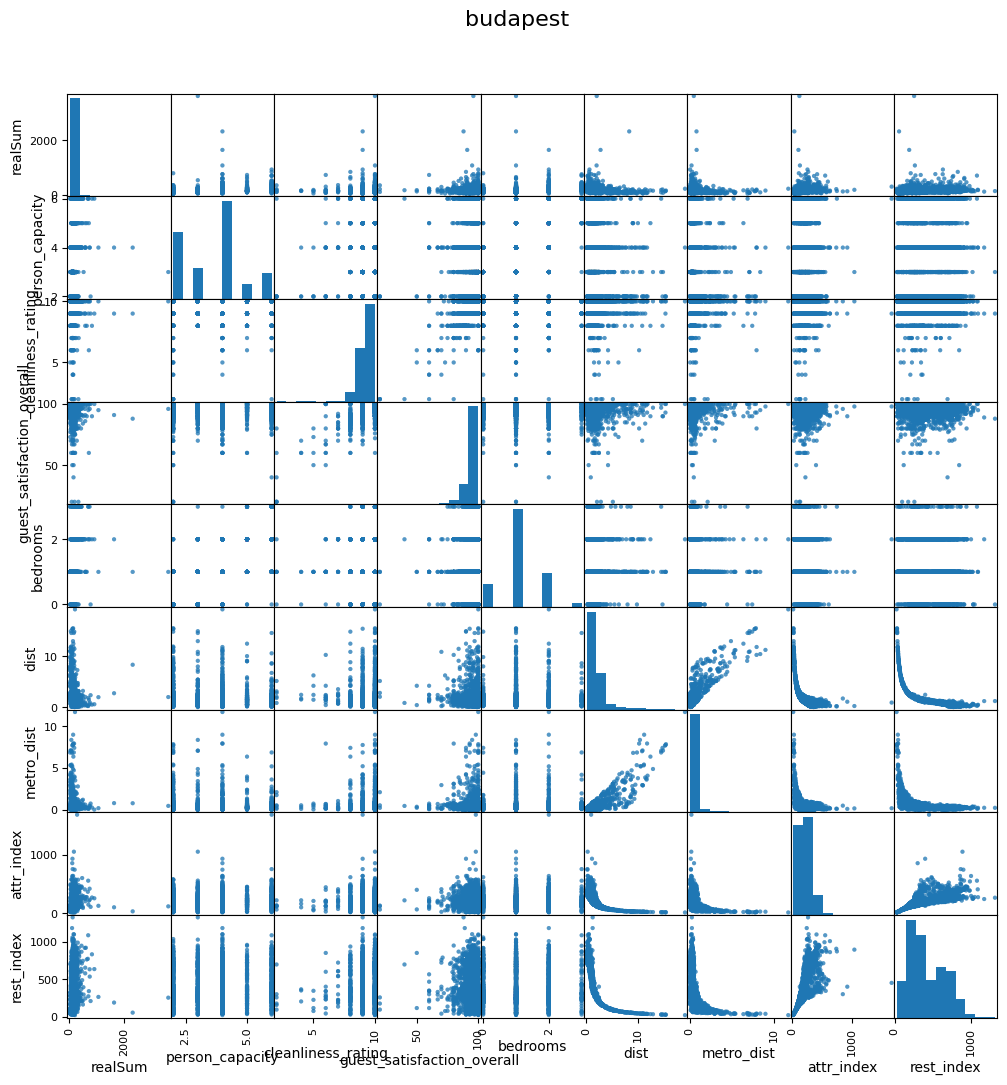

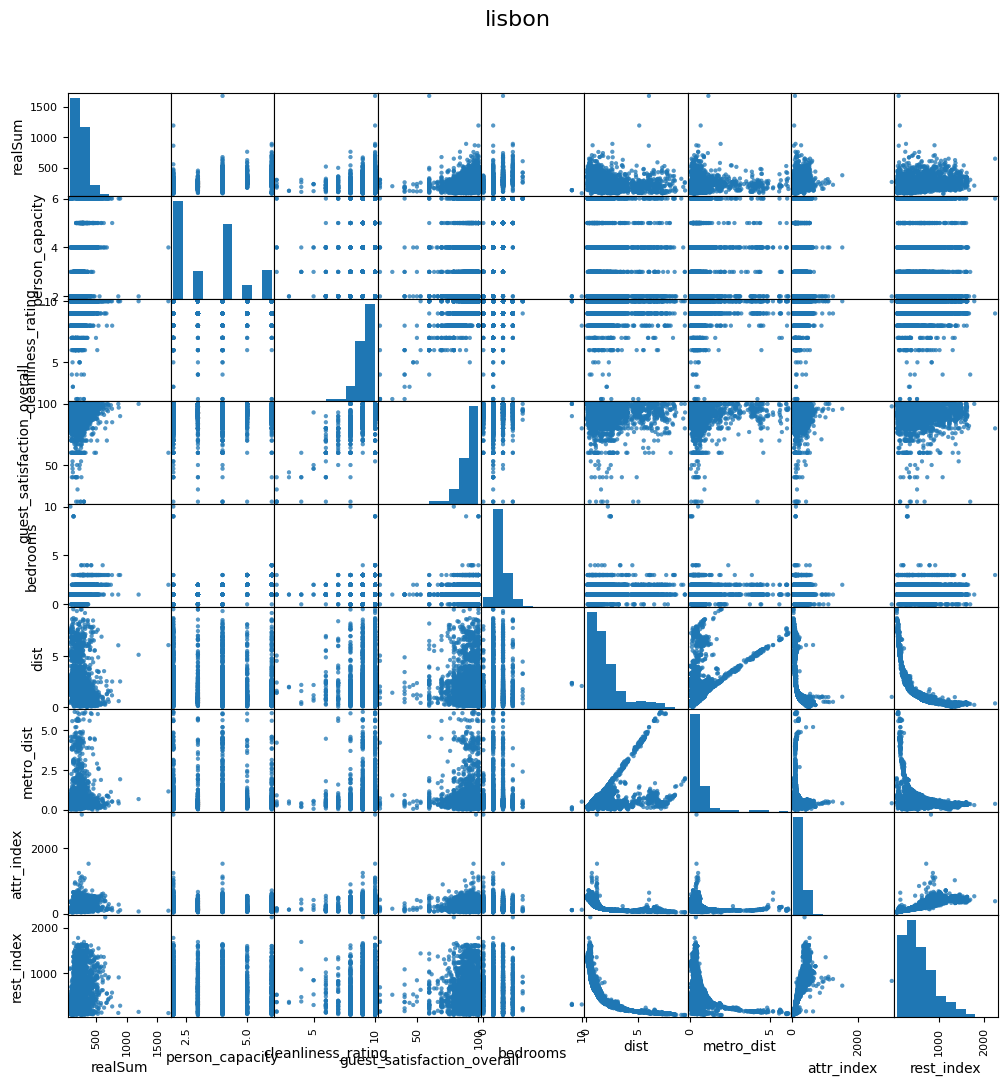

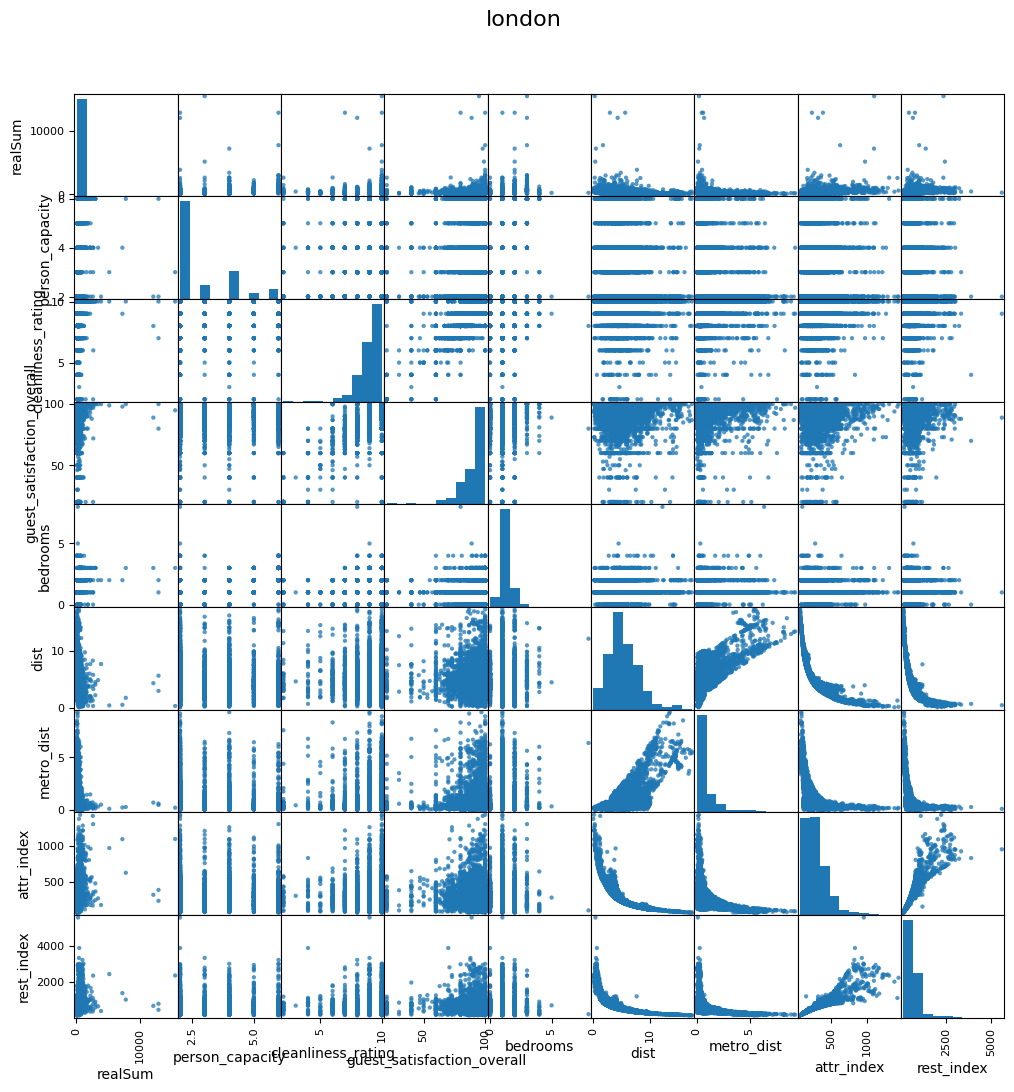

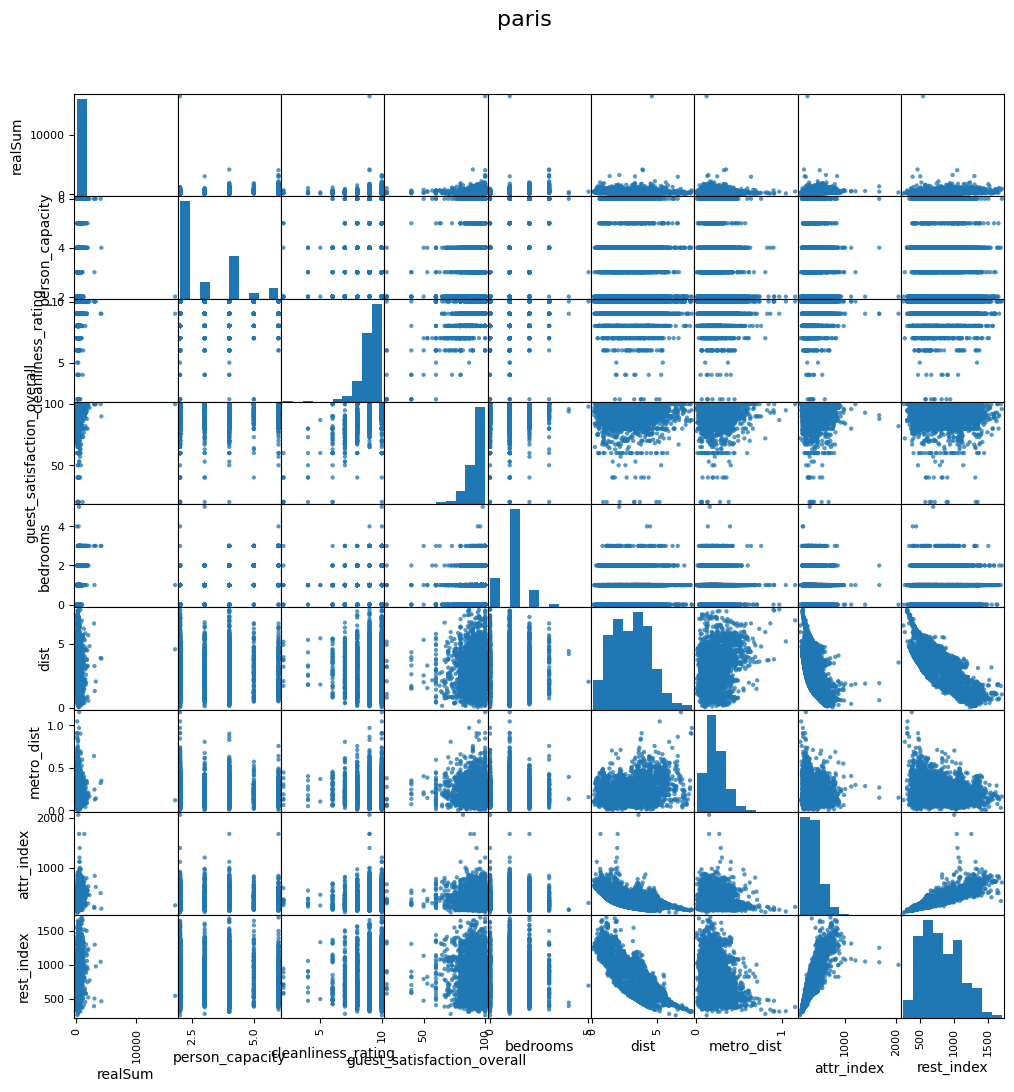

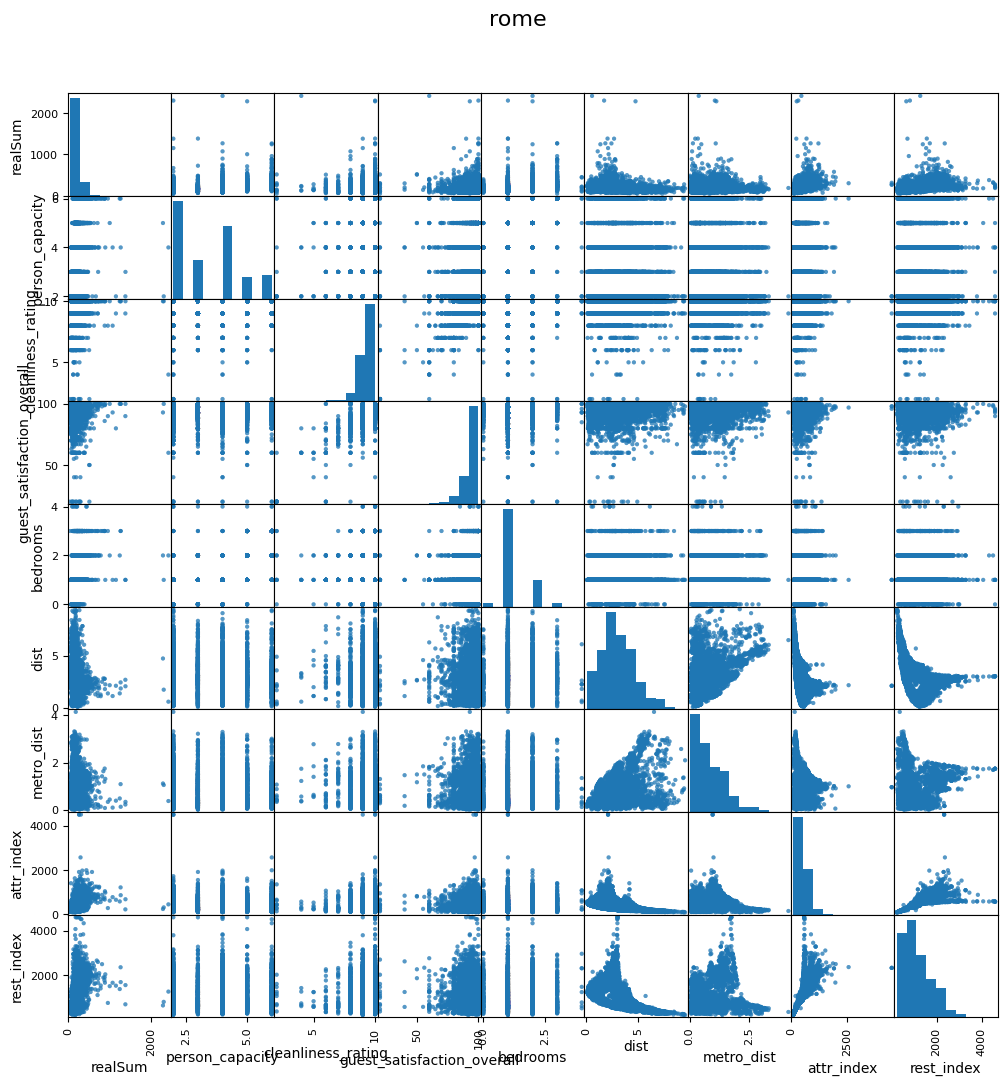

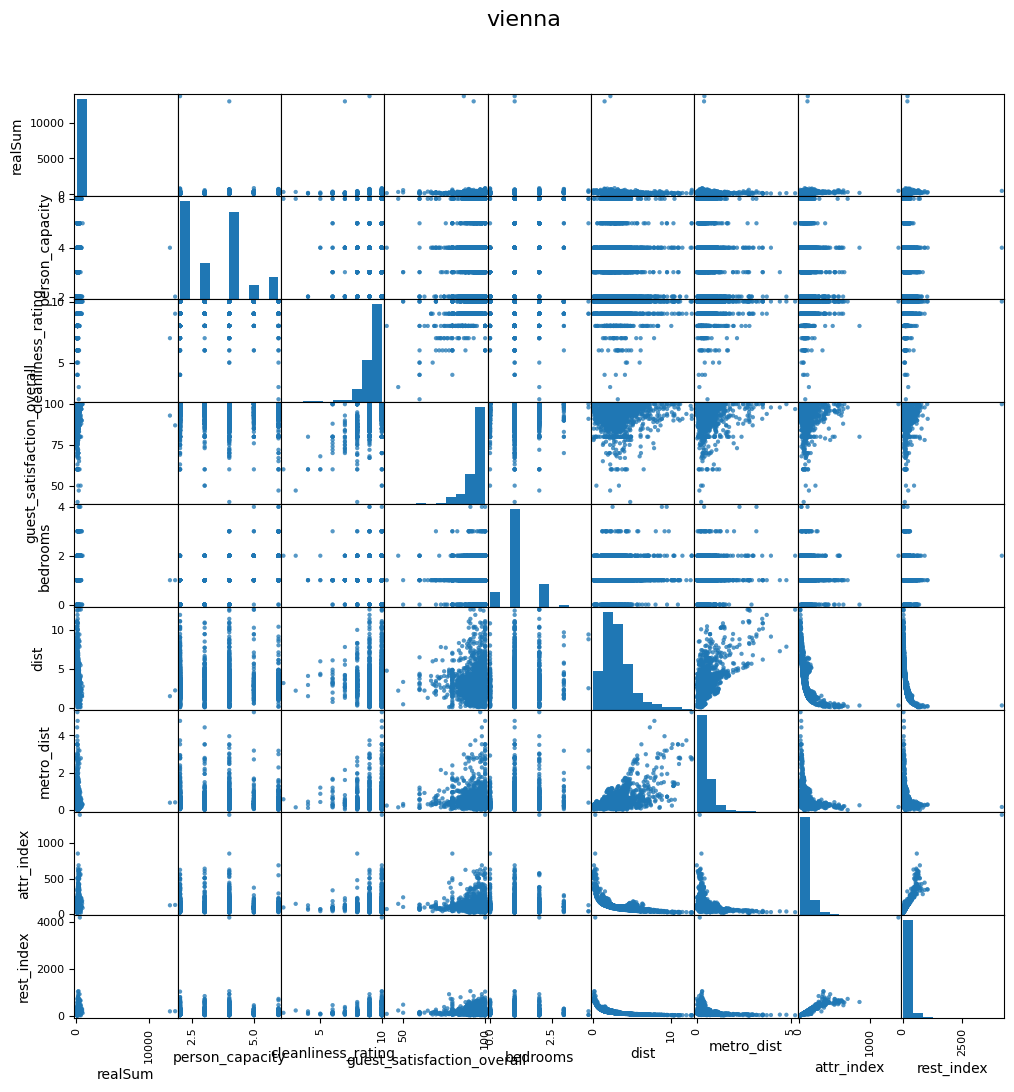

In [ ]:
# Создаем отдельные графики для каждого города
for city in merged_city['city'].unique():

    city_data = merged_city[merged_city['city'] == city]
    subset = city_data[['realSum', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index']]

    scatter_matrix(subset, figsize=(12, 12))
    plt.suptitle(f"{city}", y=0.95, fontsize=16)
    plt.show()

Text(0.5, 0.98, 'Гистограммы стоимости размещения по городам')

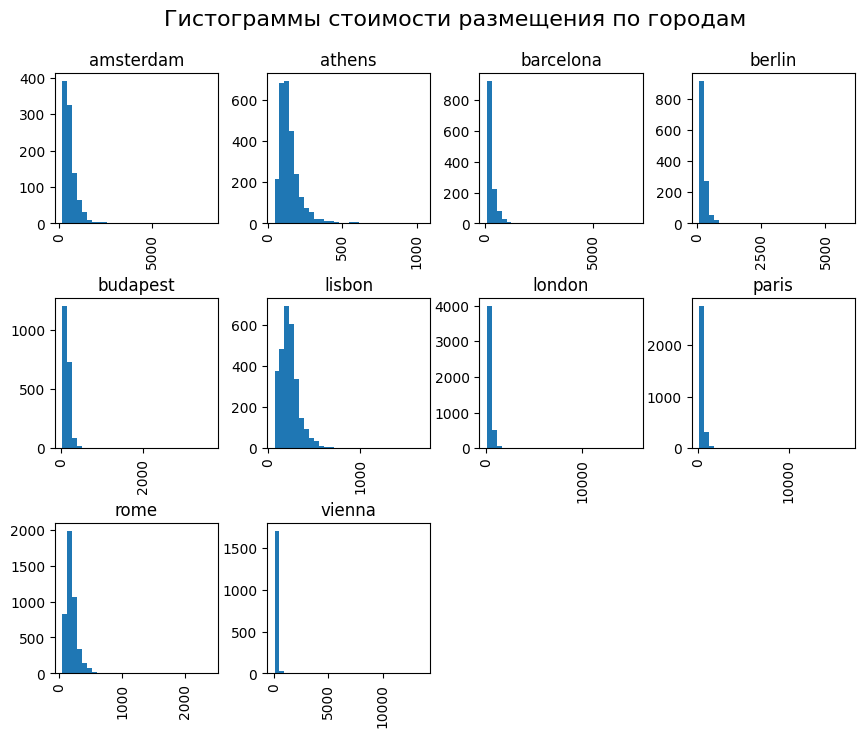

In [ ]:
merged_city_ends.hist('realSum', bins=30, by='city', layout=(3, 4), figsize=(10, 8))
plt.suptitle('Гистограммы стоимости размещения по городам', fontsize=16)

Коэффициенты корреляции Пирсона и Спирмена  
Для этих переменных:
- realSum (Стоимость размещения за сутки)
- person_capacity (Максимальное количество постояльцев): Если цена зависит, например, от размера размещения.
- cleanliness_rating (Рейтинг чистоты): Можно измерить, есть ли линейная связь между стоимостью размещения и рейтингом чистоты.
- guest_satisfaction_overall (Общий рейтинг удовлетворенности гостей): Аналогично, для измерения связи с уровнем удовлетворенности гостей.

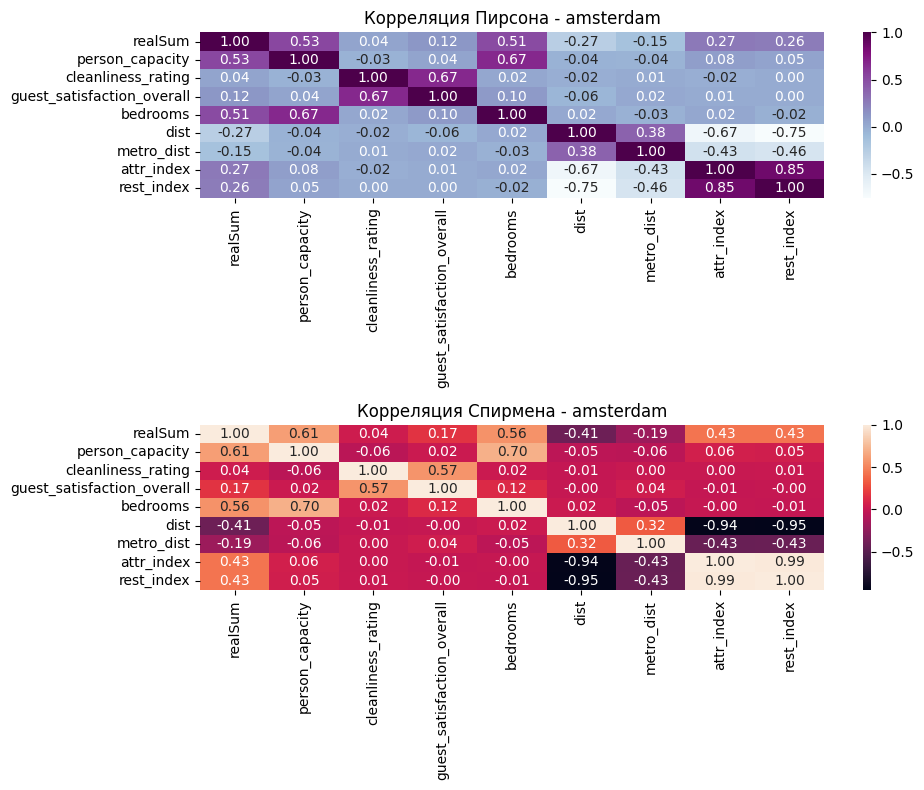

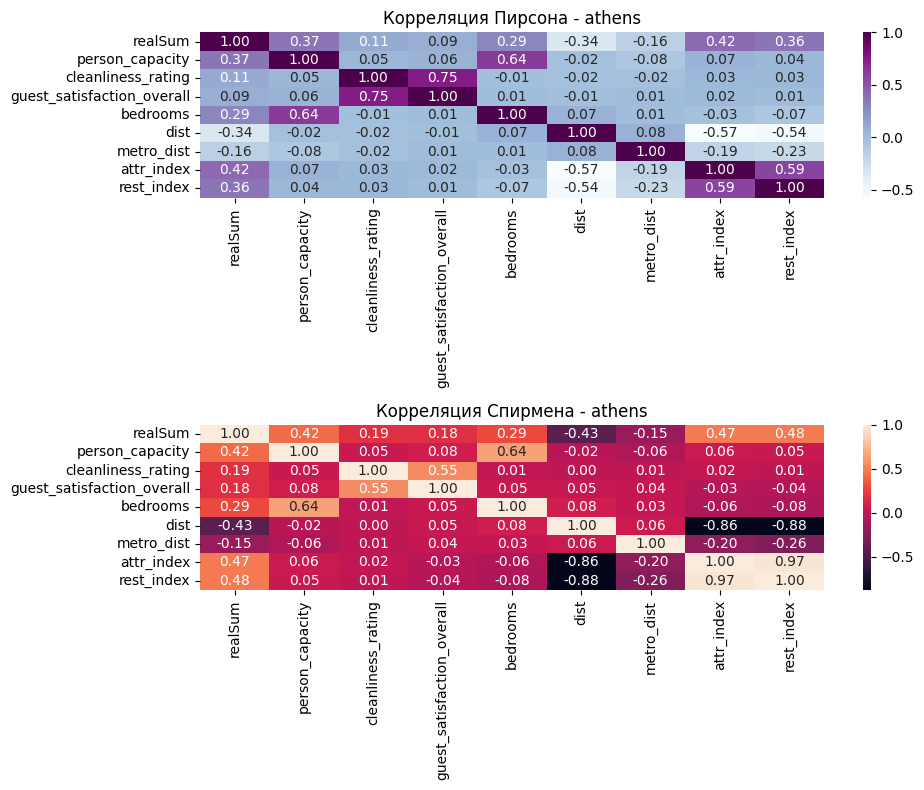

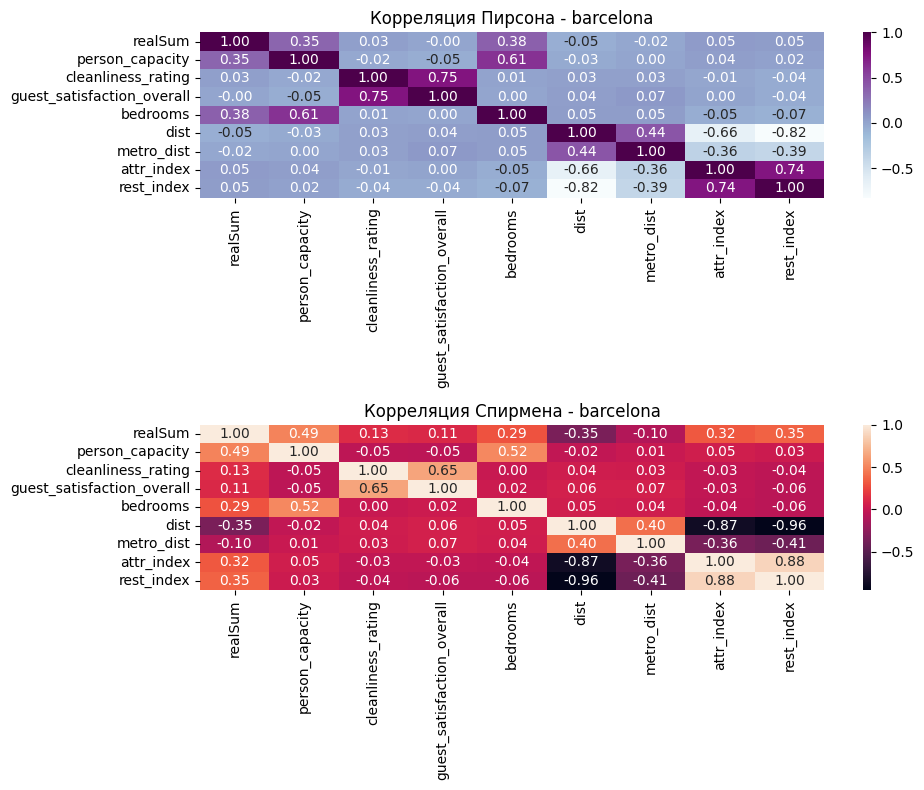

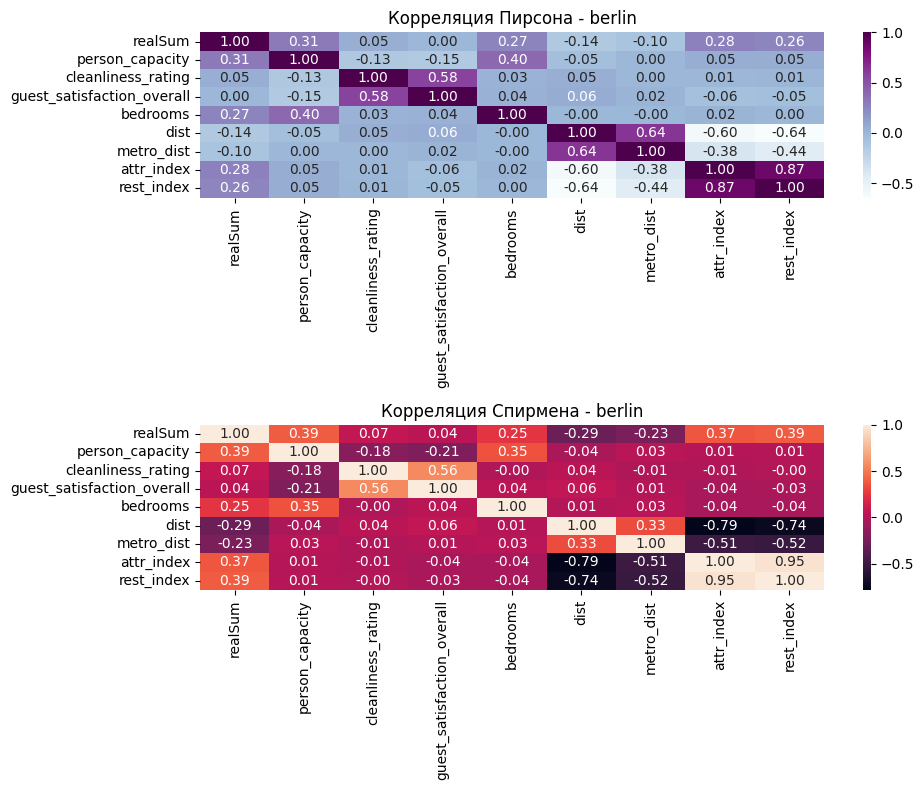

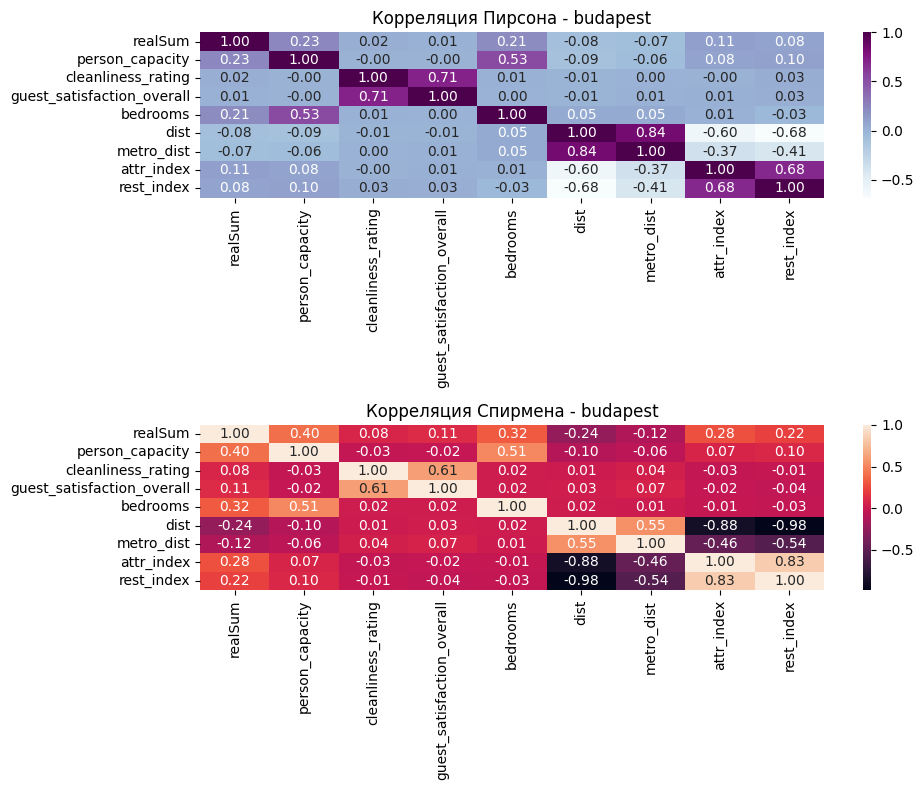

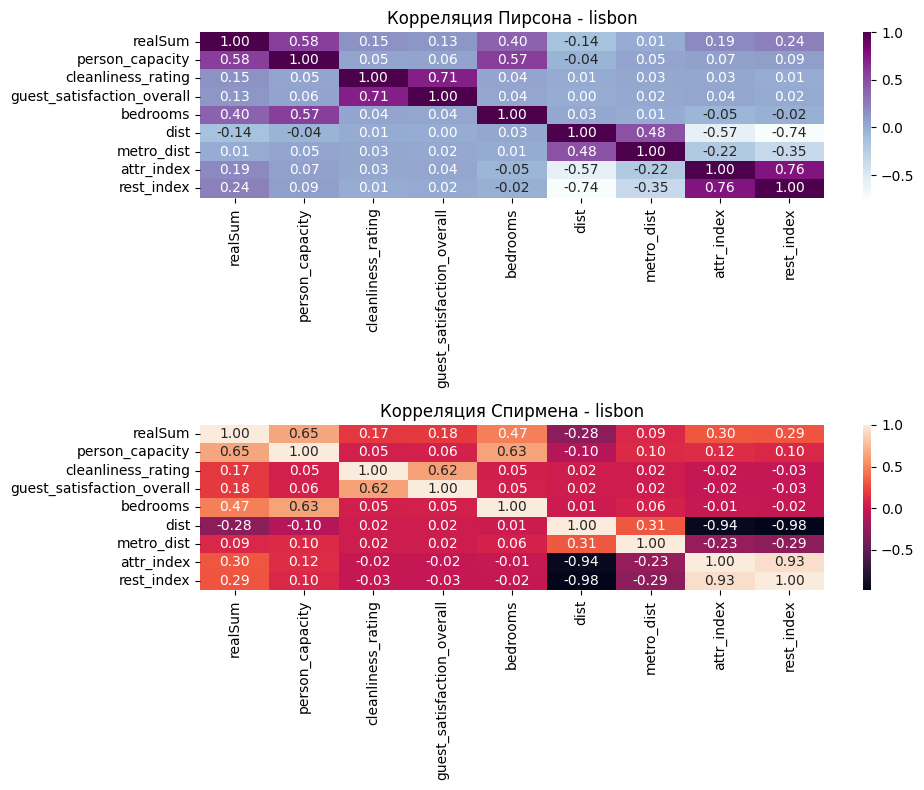

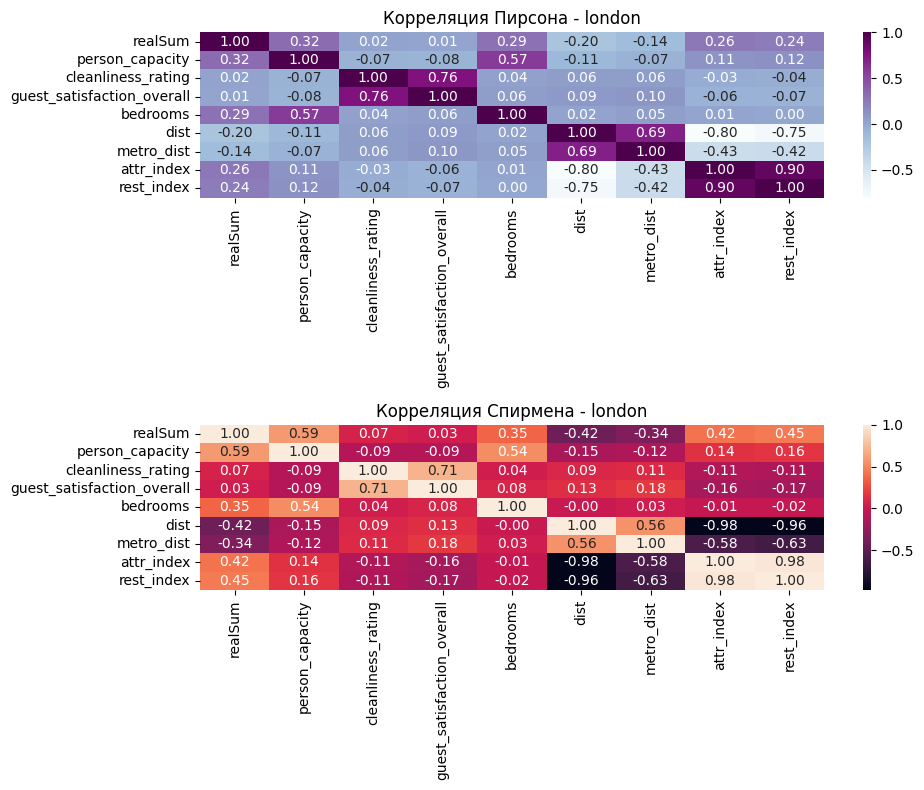

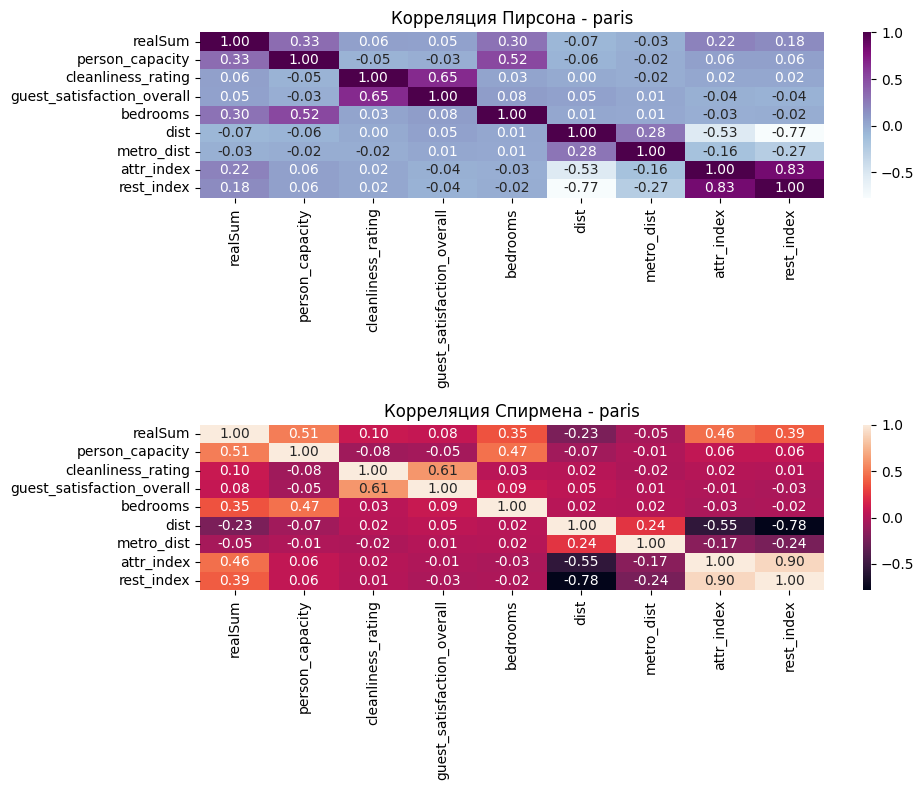

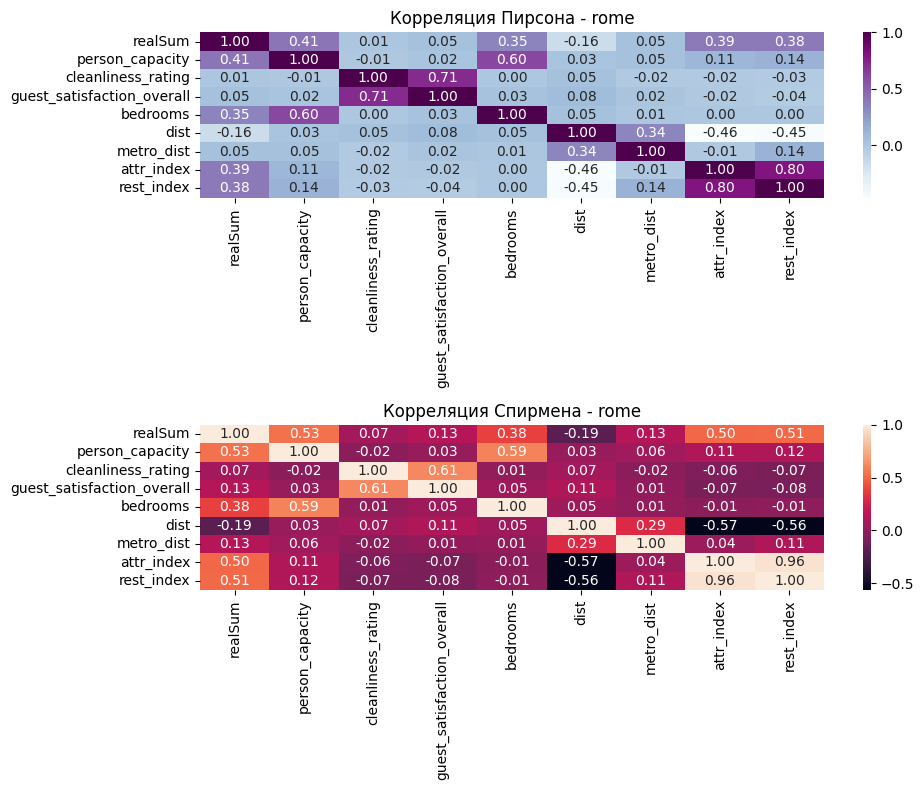

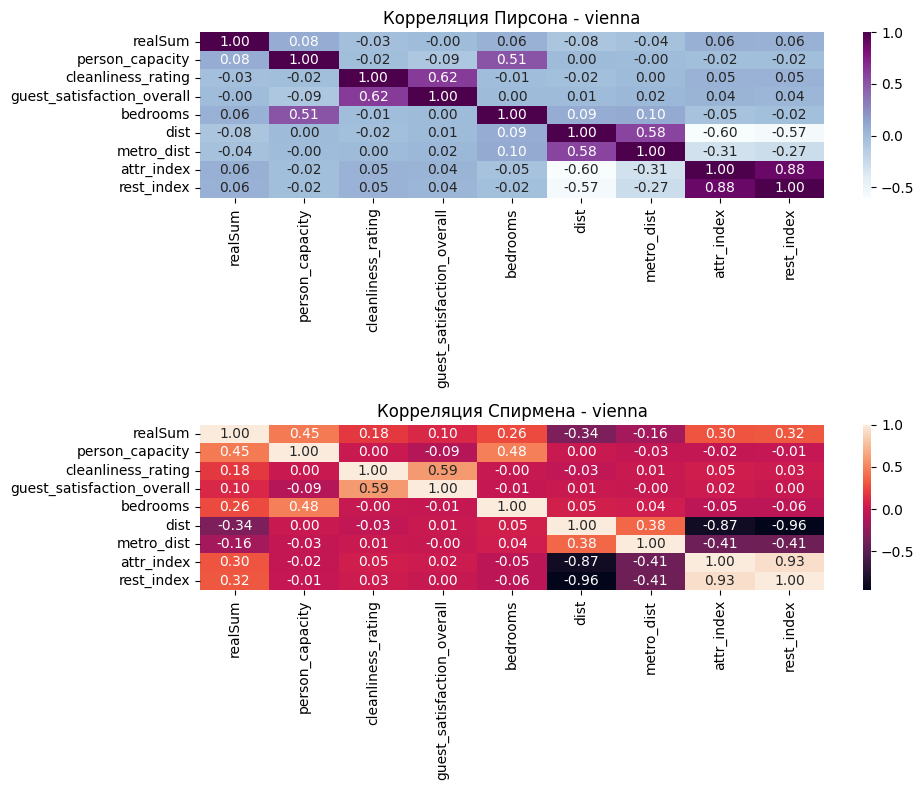

In [ ]:
subset = merged_city_ends[['realSum', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index']]

unique_cities = merged_city_ends['city'].unique()

for city in unique_cities:
    city_data = merged_city_ends[merged_city_ends['city'] == city]

    subset = city_data[['realSum', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index']]

    pearson_corr = subset.corr(method='pearson')
    spearman_corr = subset.corr(method='spearman')

    plt.figure(figsize=(10, 8))

    plt.subplot(2, 1, 1)
    sns.heatmap(pearson_corr, annot=True, cmap="BuPu", fmt=".2f")
    plt.title(f'Корреляция Пирсона - {city}')

    plt.subplot(2, 1, 2)
    sns.heatmap(spearman_corr, annot=True, fmt=".2f")
    plt.title(f'Корреляция Спирмена - {city}')

    plt.tight_layout()
    plt.show()

<ipython-input-35-f45f8de9b133>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = subset.corr(method='pearson')
<ipython-input-35-f45f8de9b133>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = subset.corr(method='spearman')


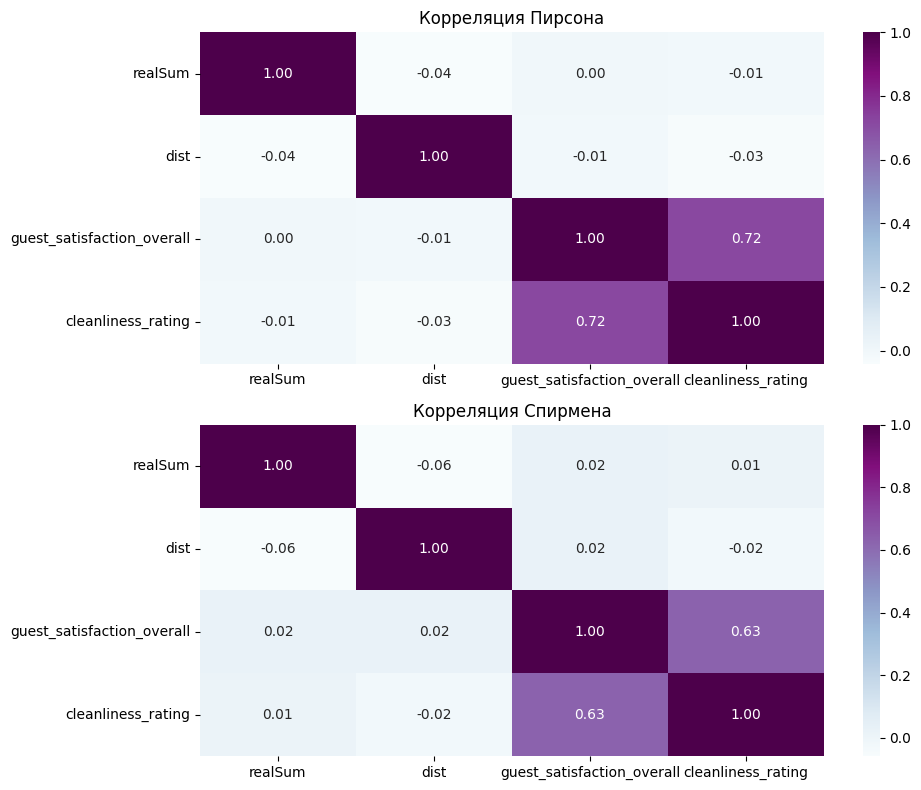

In [ ]:
subset = merged_city_ends[['realSum','dist','room_type','guest_satisfaction_overall','cleanliness_rating']]

pearson_corr = subset.corr(method='pearson')
spearman_corr = subset.corr(method='spearman')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.heatmap(pearson_corr, annot=True, cmap="BuPu", fmt=".2f")
plt.title(f'Корреляция Пирсона')

plt.subplot(2, 1, 2)
sns.heatmap(spearman_corr, annot=True, cmap="BuPu", fmt=".2f")
plt.title(f'Корреляция Спирмена')

plt.tight_layout()
plt.show()

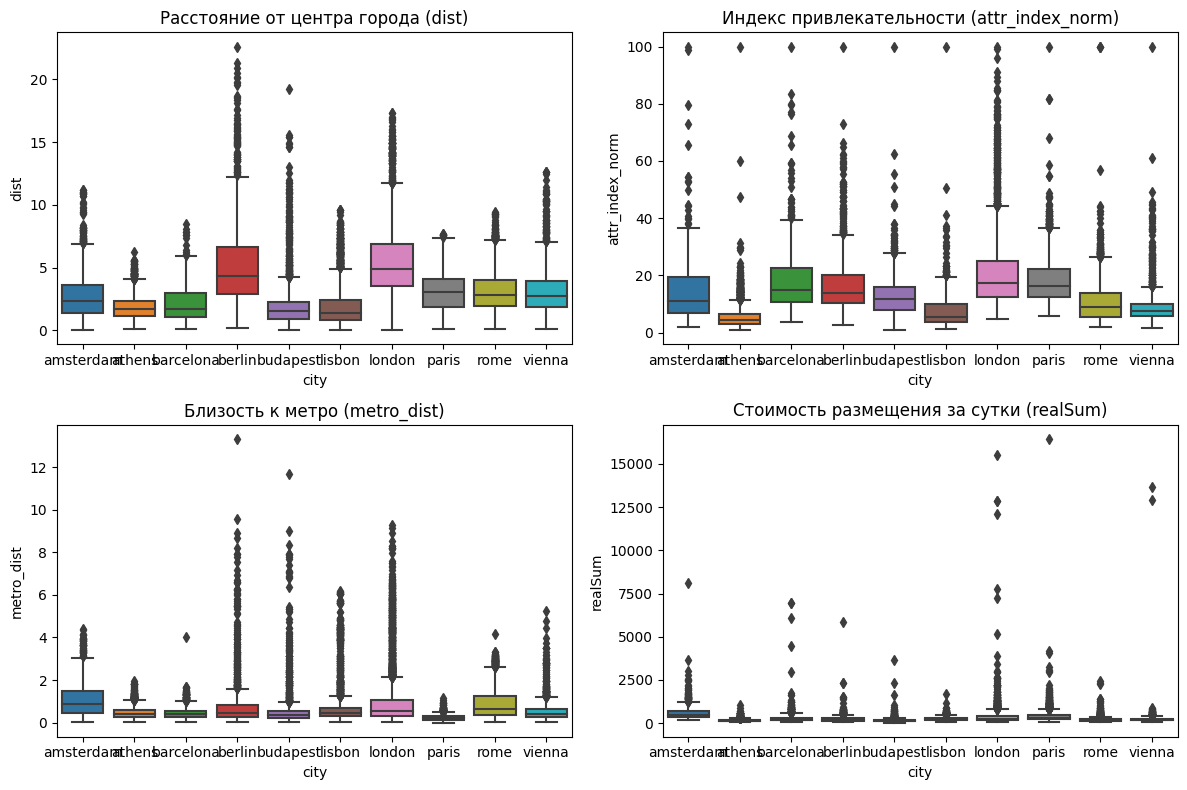

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='city', y='dist', data=merged_city_ends)
plt.title('Расстояние от центра города (dist)')

plt.subplot(2, 2, 2)
sns.boxplot(x='city', y='attr_index_norm', data=merged_city_ends)
plt.title('Индекс привлекательности (attr_index_norm)')

plt.subplot(2, 2, 3)
sns.boxplot(x='city', y='metro_dist', data=merged_city_ends)
plt.title('Близость к метро (metro_dist)')

plt.subplot(2, 2, 4)
sns.boxplot(x='city', y='realSum', data=merged_city_ends)
plt.title('Стоимость размещения за сутки (realSum)')

plt.tight_layout()
plt.show()

In [ ]:
# Список переменных для анализа
variables = ['realSum', 'dist','metro_dist', 'attr_index_norm', 'rest_index_norm', 'cleanliness_rating', 'guest_satisfaction_overall']

# Итерация по каждому городу и вывод описательных статистик для каждой переменной
for city in merged_city_ends['city'].unique():
    city_data = merged_city_ends[merged_city_ends['city'] == city][variables]
    city_description = city_data.describe()

    print(f"\nСтатистика для города {city}:")
    print(city_description)


Статистика для города amsterdam:
           realSum        dist  metro_dist  attr_index_norm  rest_index_norm  \
count   977.000000  977.000000  977.000000       977.000000       977.000000   
mean    604.828018    2.806345    1.089285        14.129476        28.692478   
std     443.682821    2.036602    0.826555        10.226766        18.689216   
min     165.912872    0.015045    0.036517         2.164941         4.430632   
25%     362.758653    1.410043    0.467145         7.026888        14.879391   
50%     491.645771    2.314549    0.876169        11.060542        23.272239   
75%     716.612378    3.610169    1.500856        19.414411        38.192618   
max    8130.668104   11.195932    4.411905       100.000000       100.000000   

       cleanliness_rating  guest_satisfaction_overall  
count          977.000000                  977.000000  
mean             9.470829                   94.685773  
std              0.830649                    6.632364  
min              2.00

In [ ]:
variables = ['realSum', 'dist','metro_dist', 'attr_index_norm', 'rest_index_norm', 'cleanliness_rating', 'guest_satisfaction_overall']

In [ ]:
for var in variables:
    print(f"\nСтатистика для {var}:")
    print(merged_city_ends[var].describe())


Статистика для realSum:
count    25071.000000
mean       276.380392
std        341.859110
min         37.129295
25%        145.056593
50%        206.438641
75%        311.177612
max      16445.614689
Name: realSum, dtype: float64

Статистика для dist:
count    25071.000000
mean         3.177620
std          2.390823
min          0.015045
25%          1.450997
50%          2.603958
75%          4.243953
max         22.617451
Name: dist, dtype: float64

Статистика для metro_dist:
count    25071.000000
mean         0.682979
std          0.853137
min          0.003944
25%          0.250670
50%          0.416323
75%          0.746587
max         13.314108
Name: metro_dist, dtype: float64

Статистика для attr_index_norm:
count    25071.000000
mean        13.298355
std          9.768799
min          0.926301
25%          6.292233
50%         11.343963
75%         17.252524
max        100.000000
Name: attr_index_norm, dtype: float64

Статистика для rest_index_norm:
count    25071.000000
mean 

metro_dist < 0.3  
dist < 1.5  
realSum < 150

Фильтры



1. Активные путешественники (много гулять по центру и посещать достопримечательности)

 Расстояние от центра города (dist)  
 близость к метро (metro_dist)

1.1 Бюджетно  

Афины  
Будапешт  
Рим

In [ ]:
active = merged_city_ends.query('realSum <= 150 and dist <= 1.5 and metro_dist <= 0.3')
active = active.groupby(['city']).count()
active.sort_values('realSum', ascending = False)

Unnamed: 0  realSum  room_type  room_shared  room_private  \
city                                                                   
budapest          257      257        257          257           257   
athens            109      109        109          109           109   
rome              107      107        107          107           107   
lisbon             70       70         70           70            70   
barcelona          12       12         12           12            12   
vienna              9        9          9            9             9   
berlin              3        3          3            3             3   
paris               2        2          2            2             2   

           person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
city                                                                            
budapest               257                257    257  257                 257   
athens                 109                109    109  109                 109   
rome                   107                107    107  107                 107   
lisbon                  70                 70     70   70                  70   
barcelona               12                 12     12   12                  12   
vienna                   9                  9      9    9                   9   
berlin                   3                  3      3    3                   3   
paris                    2                  2      2    2                   2   

           guest_satisfaction_overall  bedrooms  dist  metro_dist  attr_index  \
city                                                                            
budapest                          257       257   257         257         257   
athens                            109       109   109         109         109   
rome                              107       107   107         107         107   
lisbon                             70        70    70          70          70   
barcelona                          12        12    12          12          12   
vienna                              9         9     9           9           9   
berlin                              3         3     3           3           3   
paris                               2         2     2           2           2   

           attr_index_norm  rest_index  rest_index_norm  lng  lat  
city                                                               
budapest               257         257              257  257  257  
athens                 109         109              109  109  109  
rome                   107         107              107  107  107  
lisbon                  70          70               70   70   70  
barcelona               12          12               12   12   12  
vienna                   9           9                9    9    9  
berlin                   3           3                3    3    3  
paris                    2           2                2    2    2

1.2 Без учета стоимости  
Париж  
Лисабон  
Рим

In [ ]:
active = merged_city_ends.query('dist <= 1.5 and metro_dist <= 0.3')
active = active.groupby(['city']).count()
active.sort_values('realSum', ascending = False)

Unnamed: 0  realSum  room_type  room_shared  room_private  \
city                                                                   
budapest          593      593        593          593           593   
paris             495      495        495          495           495   
lisbon            407      407        407          407           407   
athens            301      301        301          301           301   
rome              291      291        291          291           291   
barcelona         242      242        242          242           242   
vienna            161      161        161          161           161   
london            150      150        150          150           150   
amsterdam          50       50         50           50            50   
berlin             45       45         45           45            45   

           person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
city                                                                            
budapest               593                593    593  593                 593   
paris                  495                495    495  495                 495   
lisbon                 407                407    407  407                 407   
athens                 301                301    301  301                 301   
rome                   291                291    291  291                 291   
barcelona              242                242    242  242                 242   
vienna                 161                161    161  161                 161   
london                 150                150    150  150                 150   
amsterdam               50                 50     50   50                  50   
berlin                  45                 45     45   45                  45   

           guest_satisfaction_overall  bedrooms  dist  metro_dist  attr_index  \
city                                                                            
budapest                          593       593   593         593         593   
paris                             495       495   495         495         495   
lisbon                            407       407   407         407         407   
athens                            301       301   301         301         301   
rome                              291       291   291         291         291   
barcelona                         242       242   242         242         242   
vienna                            161       161   161         161         161   
london                            150       150   150         150         150   
amsterdam                          50        50    50          50          50   
berlin                             45        45    45          45          45   

           attr_index_norm  rest_index  rest_index_norm  lng  lat  
city                                                               
budapest               593         593              593  593  593  
paris                  495         495              495  495  495  
lisbon                 407         407              407  407  407  
athens                 301         301              301  301  301  
rome                   291         291              291  291  291  
barcelona              242         242              242  242  242  
vienna                 161         161              161  161  161  
london                 150         150              150  150  150  
amsterdam               50          50               50   50   50  
berlin                  45          45               45   45   45

3. Перфекционисты  
Суперхост ли хозяин (host_is_superhost), высокий во всем рейтинг  
Рим  
Афины  
Будапешт

In [ ]:
perfect = merged_city_ends.query('host_is_superhost == True and cleanliness_rating >= 9.5 and guest_satisfaction_overall >= 95')
perfect = perfect.groupby(['city']).count()
perfect.sort_values('realSum', ascending = False)

Unnamed: 0  realSum  room_type  room_shared  room_private  \
city                                                                   
rome             1168     1168       1168         1168          1168   
athens            937      937        937          937           937   
budapest          588      588        588          588           588   
london            497      497        497          497           497   
lisbon            452      452        452          452           452   
vienna            397      397        397          397           397   
paris             313      313        313          313           313   
berlin            268      268        268          268           268   
amsterdam         214      214        214          214           214   
barcelona         171      171        171          171           171   

           person_capacity  host_is_superhost  multi   biz  \
city                                                         
rome                  1168               1168   1168  1168   
athens                 937                937    937   937   
budapest               588                588    588   588   
london                 497                497    497   497   
lisbon                 452                452    452   452   
vienna                 397                397    397   397   
paris                  313                313    313   313   
berlin                 268                268    268   268   
amsterdam              214                214    214   214   
barcelona              171                171    171   171   

           cleanliness_rating  guest_satisfaction_overall  bedrooms  dist  \
city                                                                        
rome                     1168                        1168      1168  1168   
athens                    937                         937       937   937   
budapest                  588                         588       588   588   
london                    497                         497       497   497   
lisbon                    452                         452       452   452   
vienna                    397                         397       397   397   
paris                     313                         313       313   313   
berlin                    268                         268       268   268   
amsterdam                 214                         214       214   214   
barcelona                 171                         171       171   171   

           metro_dist  attr_index  attr_index_norm  rest_index  \
city                                                             
rome             1168        1168             1168        1168   
athens            937         937              937         937   
budapest          588         588              588         588   
london            497         497              497         497   
lisbon            452         452              452         452   
vienna            397         397              397         397   
paris             313         313              313         313   
berlin            268         268              268         268   
amsterdam         214         214              214         214   
barcelona         171         171              171         171   

           rest_index_norm   lng   lat  
city                                    
rome                  1168  1168  1168  
athens                 937   937   937  
budapest               588   588   588  
london                 497   497   497  
lisbon                 452   452   452  
vienna                 397   397   397  
paris                  313   313   313  
berlin                 268   268   268  
amsterdam              214   214   214  
barcelona              171   171   171

In [ ]:
perfect = merged_city_ends.query('host_is_superhost == True and cleanliness_rating >= 9.5 and guest_satisfaction_overall >= 95 and realSum <= 100')
perfect = perfect.groupby(['city']).count()
perfect.sort_values('realSum', ascending = False)

Unnamed: 0  realSum  room_type  room_shared  room_private  \
city                                                                  
athens           190      190        190          190           190   
rome              56       56         56           56            56   
budapest          50       50         50           50            50   
london             9        9          9            9             9   
vienna             7        7          7            7             7   
berlin             5        5          5            5             5   
lisbon             5        5          5            5             5   

          person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
city                                                                           
athens                190                190    190  190                 190   
rome                   56                 56     56   56                  56   
budapest               50                 50     50   50                  50   
london                  9                  9      9    9                   9   
vienna                  7                  7      7    7                   7   
berlin                  5                  5      5    5                   5   
lisbon                  5                  5      5    5                   5   

          guest_satisfaction_overall  bedrooms  dist  metro_dist  attr_index  \
city                                                                           
athens                           190       190   190         190         190   
rome                              56        56    56          56          56   
budapest                          50        50    50          50          50   
london                             9         9     9           9           9   
vienna                             7         7     7           7           7   
berlin                             5         5     5           5           5   
lisbon                             5         5     5           5           5   

          attr_index_norm  rest_index  rest_index_norm  lng  lat  
city                                                              
athens                190         190              190  190  190  
rome                   56          56               56   56   56  
budapest               50          50               50   50   50  
london                  9           9                9    9    9  
vienna                  7           7                7    7    7  
berlin                  5           5                5    5    5  
lisbon                  5           5                5    5    5

In [ ]:
Соло - путешественник (близское расстояние до ресторанов, рядом с центром, 1 спальня):

Будапешт 2. Лиссабон 3. Париж
[ ]
solo_weekend_amsterdam = amsterdam_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_amsterdam.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_amsterdam.describe()
output

[ ]
vienna_weekdays.head()
output

[ ]
solo_weekend_athens = athens_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_athens.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_athens.describe()
output

[ ]
solo_weekend_barcelona = barcelona_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_barcelona.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_barcelona.describe()
output

[ ]
solo_weekend_berlin = berlin_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_berlin.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_berlin.describe()
output

[ ]
solo_weekend_budapest = budapest_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_budapest.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_budapest.describe()
output

[ ]
solo_weekend_lisbon = lisbon_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_lisbon.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_lisbon.describe()
output

[ ]
solo_weekend_london = london_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_london.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_london.describe()
output

[ ]
solo_weekend_paris = paris_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_paris.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_paris.describe()
output

[ ]
solo_weekend_rome = rome_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_rome .plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_rome .describe()
output

[ ]
solo_weekend_vienna= vienna_weekends.query('rest_index_norm > 50 and dist < 2 and bedrooms == 1')
solo_weekend_vienna.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
solo_weekend_vienna.describe()
output

Семейная поездка (жилье целиком, от 2 спален, от 4 человек)

Рим
Афины
Лиссабон
Лондон (для состоятельных семей)
[ ]
family_weekend_amsterdam = amsterdam_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_amsterdam.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_amsterdam.describe()
output

[ ]
family_weekend_athens = athens_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_athens.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_athens.describe()
output

[ ]
family_weekend_barcelona = barcelona_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_barcelona.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_barcelona.describe()
output

[ ]
family_weekend_berlin = berlin_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_berlin.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_berlin.describe()
output

[ ]
family_weekend_budapest = budapest_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_budapest.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_budapest.describe()
output

[ ]
family_weekend_lisbon = lisbon_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_lisbon.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_lisbon.describe()
output

[ ]
family_weekend_london = london_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_london.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_london.describe()
output

[ ]
family_weekend_paris = paris_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_paris.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_paris.describe()
output

[ ]
family_weekend_rome = rome_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_rome.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_rome.describe()
output

[ ]
family_weekend_vienna = vienna_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and bedrooms > 1')
family_weekend_vienna.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
family_weekend_vienna.describe()
output

Романтические выходные (жилье целиком, 2 человека, близость к центру, близость к ресторанам) 1.Будапешт 2.Париж 3.Лиссабон

[ ]
romantic_weekend_amsterdam = amsterdam_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_amsterdam.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_amsterdam.describe()
output

[ ]
romantic_weekend_athens = athens_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_athens.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_athens.describe()
output

[ ]
romantic_weekend_barcelona = barcelona_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_barcelona.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_barcelona.describe()
output

[ ]
romantic_weekend_berlin = berlin_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_berlin.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_berlin.describe()
output

[ ]
romantic_weekend_budapest = budapest_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_budapest.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_budapest.describe()
output

[ ]
romantic_weekend_lisbon = lisbon_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_lisbon.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_lisbon.describe()
output

[ ]
romantic_weekend_london = london_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_london.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_london.describe()
output

[ ]
romantic_weekend_paris = paris_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_paris.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_paris.describe()
output

[ ]
romantic_weekend_rome = rome_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_rome.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_rome.describe()
output

[ ]
romantic_weekend_vienna = vienna_weekends.query('person_capacity > 3 and room_type == "Entire home/apt" and rest_index_norm > 50 and dist < 2')
romantic_weekend_vienna.plot('realSum', 'guest_satisfaction_overall', kind='scatter')
romantic_weekend_vienna.describe()
output



In [ ]:
cleanliness_ratings_by_city = merged_city_ends.groupby('city')['cleanliness_rating'].mean()
cleanliness_ratings_by_city.sort_values(ascending = False)

city
athens       9.631900
rome         9.516028
berlin       9.475078
vienna       9.472957
amsterdam    9.470829
budapest     9.469142
lisbon       9.362618
barcelona    9.298905
paris        9.253994
london       9.153013
Name: cleanliness_rating, dtype: float64

Матрица коэффициентов корреляции


<Axes: >

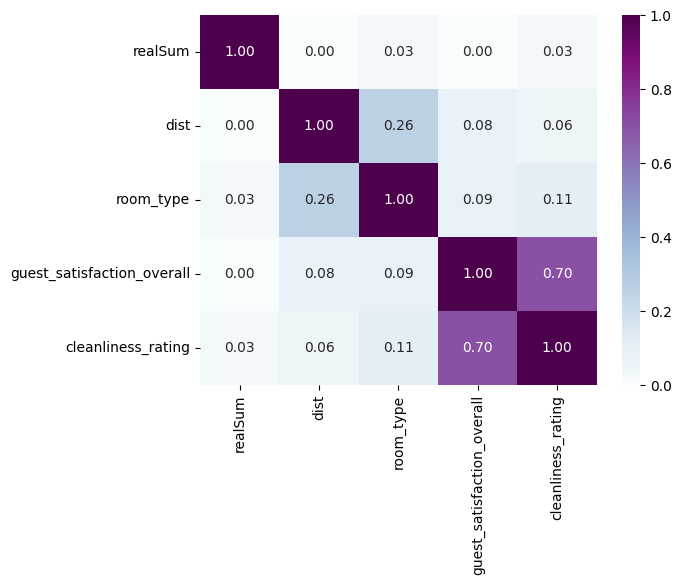

In [ ]:
merged_city_ends['room_type'] = pd.factorize(merged_city_ends['room_type'])[0]
print('Матрица коэффициентов корреляции')
k = merged_city_ends[['realSum','dist','room_type','guest_satisfaction_overall','cleanliness_rating']].phik_matrix(interval_cols=['realSum','dist','room_type','guest_satisfaction_overall','cleanliness_rating'])

sns.heatmap(k, annot=True, cmap="BuPu", fmt=".2f")